In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d['c_weight'] = d['weight'] - np.mean(d['weight'])
d.head()

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614


In [3]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.

2. Plot a joint distribution of mu and sigma.

3. Check if samples are consistent with priors

4. Check if observed data is possible to obtain using priors.

In [4]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,232.163,8.126140,217.968
1,0.0,0.0,188.640,70.331700,297.765
2,0.0,0.0,170.755,11.778900,178.482
3,0.0,0.0,182.602,19.518000,217.971
4,0.0,0.0,152.394,4.678490,159.762
...,...,...,...,...,...
995,0.0,0.0,178.704,0.038448,178.692
996,0.0,0.0,172.086,5.345250,171.941
997,0.0,0.0,188.423,12.742400,183.248
998,0.0,0.0,154.132,4.810070,151.071


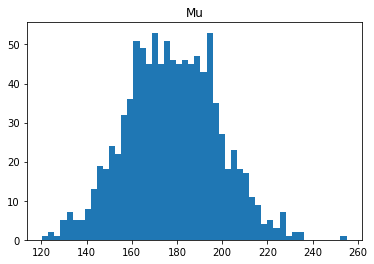

In [5]:
mu = df['mu']
plt.hist(mu, bins=50)
plt.title('Mu')
plt.show()

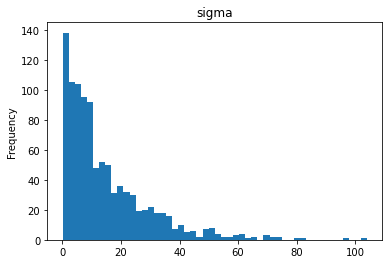

In [6]:
sigma = df['sigma']
sigma.plot.hist(bins=50)
plt.title('sigma')
plt.show()

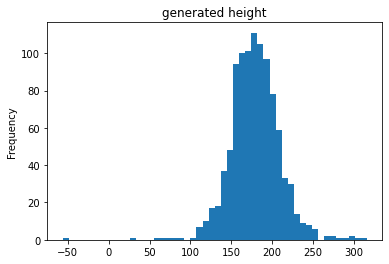

In [7]:
height = df['height']
height.plot.hist(bins=50)
plt.title('generated height')
plt.show()

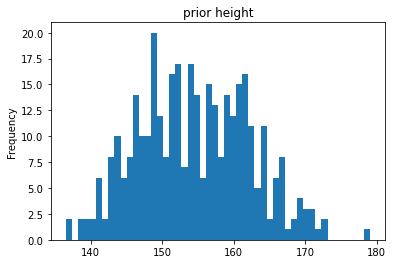

In [8]:
pr_height = d['height']
pr_height.plot.hist(bins=50)
plt.title('prior height')
plt.show()

D:\work\Anaconda\envs\data_sc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


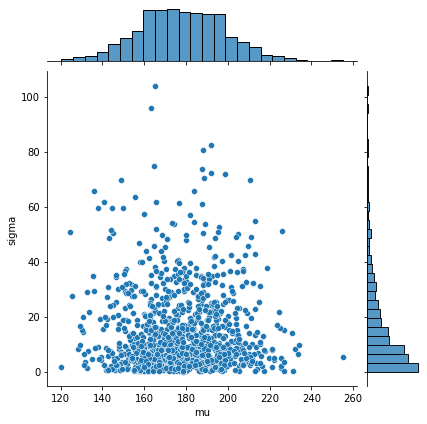

In [9]:
sns.jointplot('mu','sigma',data=df)

From the comparasing of histograms of height and generated height values it seems that model doesn't fully represent nor predicts the original values of variable. This conclusion also comes from a join plot of mu and sigma variables, which doesn't look like a normal distribution. Therefore created model is not effective.

In [10]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan') 

INFO:cmdstanpy:found newer exe file, not recompiling


In [11]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


D:\work\Anaconda\envs\data_sc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


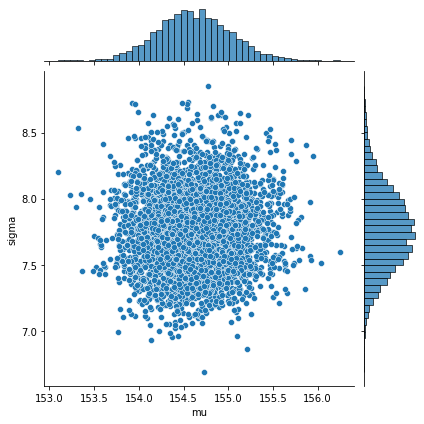

In [12]:
df_fit = fit.draws_pd()
sns.jointplot('mu','sigma',data=df_fit)

In [13]:
df_fit

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.475,0.989141,0.879734,3.0,7.0,0.0,898.035,155.103,8.10072,151.389
1,-895.714,0.996108,0.879734,2.0,3.0,0.0,896.915,154.992,7.57395,153.867
2,-896.343,0.895673,0.879734,2.0,3.0,0.0,897.119,155.228,7.90630,146.875
3,-895.404,0.991829,0.879734,2.0,3.0,0.0,896.577,154.815,7.56726,154.424
4,-895.849,0.841095,0.879734,2.0,3.0,0.0,896.865,154.890,8.04910,147.182
...,...,...,...,...,...,...,...,...,...,...
3995,-895.627,1.000000,0.838787,2.0,3.0,0.0,896.279,154.803,8.01422,144.451
3996,-895.727,0.982861,0.838787,1.0,1.0,0.0,895.799,154.755,8.05962,145.407
3997,-895.745,0.978395,0.838787,3.0,7.0,0.0,896.465,155.072,7.80211,165.997
3998,-895.541,0.984102,0.838787,2.0,7.0,0.0,896.007,154.218,7.76397,147.339


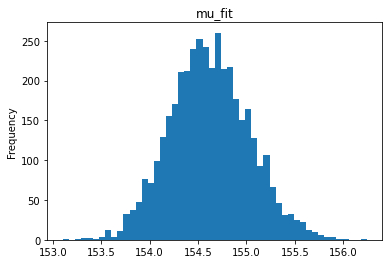

In [14]:
mu = df_fit['mu']
mu.plot.hist(bins=50)
plt.title('mu_fit')
plt.show()

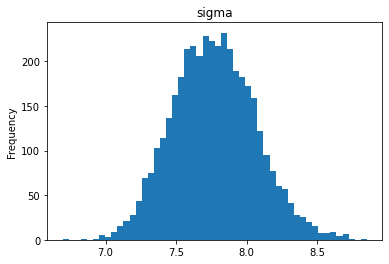

In [15]:
sigma = df_fit['sigma']
sigma.plot.hist(bins=50)
plt.title('sigma')
plt.show()

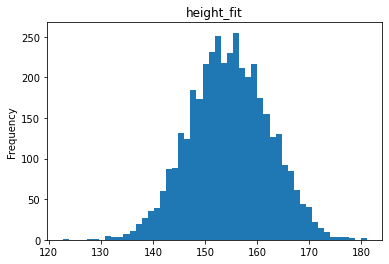

In [16]:
height = df_fit['height']

height.plot.hist(bins=50)
plt.title('height_fit')
plt.show()

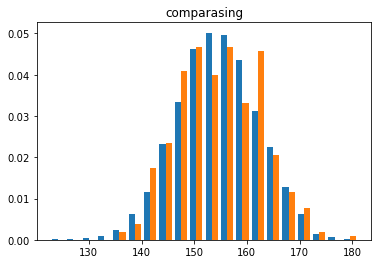

In [17]:
pr_height = d.height
plt.hist([height,pr_height],bins=20,density=True)
plt.title('comparasing')
plt.show()

Fitted model is much more reliably correlates with original values which only suggests it's success.

In [18]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)
print(data_sim)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



{'N': 50, 'weight': array([-13.91943352, -13.26797358, -12.61651364, -11.9650537 ,
       -11.31359376, -10.66213383, -10.01067389,  -9.35921395,
        -8.70775401,  -8.05629407,  -7.40483413,  -6.75337419,
        -6.10191425,  -5.45045432,  -4.79899438,  -4.14753444,
        -3.4960745 ,  -2.84461456,  -2.19315462,  -1.54169468,
        -0.89023474,  -0.23877481,   0.41268513,   1.06414507,
         1.71560501,   2.36706495,   3.01852489,   3.66998483,
         4.32144477,   4.9729047 ,   5.62436464,   6.27582458,
         6.92728452,   7.57874446,   8.2302044 ,   8.88166434,
         9.53312428,  10.18458421,  10.83604415,  11.48750409,
        12.13896403,  12.79042397,  13.44188391,  14.09334385,
        14.74480379,  15.39626373,  16.04772366,  16.6991836 ,
        17.35064354,  18.00210348])}


In [19]:
df_ppc = sim.draws_pd()
df_ppc

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,7.771810,23.208300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0100
1,0.0,0.0,154.022,-0.067795,0.086958,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.7940
2,0.0,0.0,169.461,-11.386400,20.358900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31.1721
3,0.0,0.0,158.357,-2.544520,6.415610,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.2640
4,0.0,0.0,158.131,16.710200,9.955320,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.8480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,12.613000,6.017940,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.7440
996,0.0,0.0,196.362,12.233800,10.413300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414.6210
997,0.0,0.0,172.792,-2.720510,76.805200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.5153
998,0.0,0.0,126.115,9.871600,23.204300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.8210


In [20]:
alpha = df_ppc['alpha']
beta = df_ppc['beta']

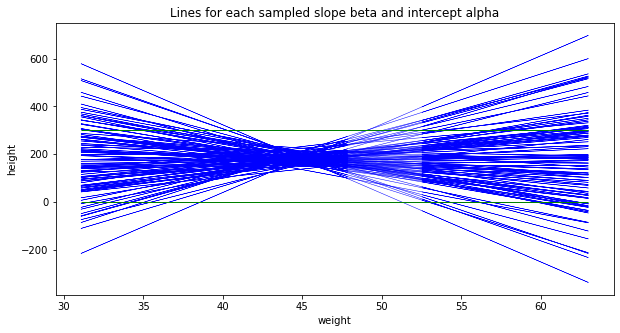

In [21]:
fig, axs = plt.subplots(1, 1, figsize = (10, 5))

for i in range(100):
    axs.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axs.set_xlabel('weight')
axs.set_ylabel('height')
axs.hlines([0, 300], xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'g')

In [58]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')
d['c_weight'] = d.weight - np.mean(d.weight)

INFO:cmdstanpy:compiling stan file C:\Users\Roman\Documents\Data_science\Lab_4\height_2b_ppc.stan to exe file C:\Users\Roman\Documents\Data_science\Lab_4\height_2b_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Roman\Documents\Data_science\Lab_4\height_2b_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Roman/Documents/Data_science/Lab_4/height_2b_ppc.hpp C:/Users/Roman/Documents/Data_science/Lab_4/height_2b_ppc.stan
Warning in 'C:/Users/Roman/Documents/Data_science/Lab_4/height_2b_ppc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Roman/Documents/Data_science/Lab_4/height_2b_ppc.stan', line 10, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be r

In [59]:
sim_2b_ppc=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [60]:
df_ppc = sim_2b_ppc.draws_pd()
df_ppc

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,2.175330,23.208300,204.8450,171.0550,210.4310,233.9560,260.127,...,285.555,303.685,297.132,268.853,232.152,253.157,260.7570,286.215,276.528,286.262
1,0.0,0.0,154.022,0.993243,0.086958,140.3020,140.9090,141.5550,142.2400,142.890,...,166.311,166.723,167.294,168.006,168.584,169.359,169.8700,170.599,171.368,171.895
2,0.0,0.0,169.461,0.320255,20.358900,193.8410,161.3800,162.1560,177.9480,173.857,...,208.951,146.572,204.575,180.818,214.050,174.593,194.8570,183.950,174.206,179.572
3,0.0,0.0,158.357,0.775342,6.415610,156.0910,143.8370,147.1780,142.9640,148.170,...,171.353,169.268,171.293,178.491,166.968,167.220,176.5270,168.233,174.413,170.029
4,0.0,0.0,158.131,5.317560,9.955320,58.1275,81.6902,83.2381,86.8028,110.857,...,238.332,239.195,222.334,234.851,235.169,235.514,238.1780,254.476,256.122,245.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,3.529990,6.017940,118.5540,105.3130,117.8230,119.7010,123.187,...,208.193,192.313,214.447,209.582,229.831,214.508,218.2810,233.568,220.461,219.232
996,0.0,0.0,196.362,3.398650,10.413300,156.0350,157.7590,149.1370,157.6230,143.776,...,232.726,245.673,247.483,226.440,255.831,244.248,229.6110,267.096,251.912,255.570
997,0.0,0.0,172.792,0.761815,76.805200,124.7720,258.8120,224.3530,171.7050,187.482,...,131.665,149.488,228.971,45.224,192.906,248.024,97.7731,207.919,125.191,149.205
998,0.0,0.0,126.115,2.683600,23.204300,109.4960,96.0887,87.9963,106.8710,125.236,...,151.940,155.715,118.372,144.143,191.467,162.398,195.9580,145.848,140.698,179.422


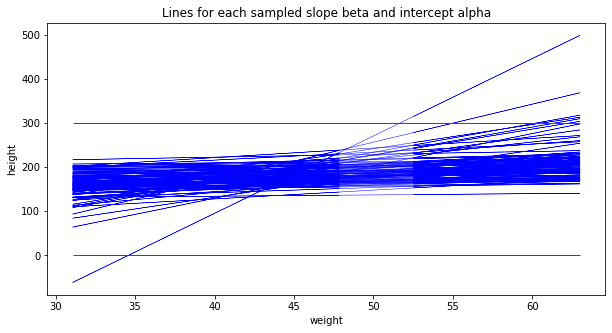

In [61]:
beta = df_ppc['beta']
alpha = df_ppc['alpha']
fig, axs = plt.subplots(1, 1, figsize=(10,5))

for i in range(100):
    axs.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color = 'b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axs.set_xlabel('weight')
axs.set_ylabel('height')
axs.hlines([0, 300], xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'g')

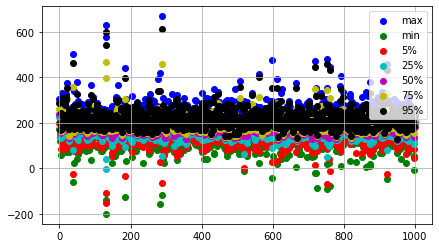

In [67]:
sim_height = sim_2b_ppc.stan_variable('height')
x_list = [i for i in range (len(sim_height))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in sim_height:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'b')
plt.scatter(x_list, min_height, color = 'g')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'c')
plt.scatter(x_list, fifty_quantile,  color = 'm')
plt.scatter(x_list, sevenFive_quantile, color = 'y')
plt.scatter(x_list, nineFive_qantile,  color = 'k') 
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()

In [63]:
df_ppc

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,2.175330,23.208300,204.8450,171.0550,210.4310,233.9560,260.127,...,285.555,303.685,297.132,268.853,232.152,253.157,260.7570,286.215,276.528,286.262
1,0.0,0.0,154.022,0.993243,0.086958,140.3020,140.9090,141.5550,142.2400,142.890,...,166.311,166.723,167.294,168.006,168.584,169.359,169.8700,170.599,171.368,171.895
2,0.0,0.0,169.461,0.320255,20.358900,193.8410,161.3800,162.1560,177.9480,173.857,...,208.951,146.572,204.575,180.818,214.050,174.593,194.8570,183.950,174.206,179.572
3,0.0,0.0,158.357,0.775342,6.415610,156.0910,143.8370,147.1780,142.9640,148.170,...,171.353,169.268,171.293,178.491,166.968,167.220,176.5270,168.233,174.413,170.029
4,0.0,0.0,158.131,5.317560,9.955320,58.1275,81.6902,83.2381,86.8028,110.857,...,238.332,239.195,222.334,234.851,235.169,235.514,238.1780,254.476,256.122,245.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,3.529990,6.017940,118.5540,105.3130,117.8230,119.7010,123.187,...,208.193,192.313,214.447,209.582,229.831,214.508,218.2810,233.568,220.461,219.232
996,0.0,0.0,196.362,3.398650,10.413300,156.0350,157.7590,149.1370,157.6230,143.776,...,232.726,245.673,247.483,226.440,255.831,244.248,229.6110,267.096,251.912,255.570
997,0.0,0.0,172.792,0.761815,76.805200,124.7720,258.8120,224.3530,171.7050,187.482,...,131.665,149.488,228.971,45.224,192.906,248.024,97.7731,207.919,125.191,149.205
998,0.0,0.0,126.115,2.683600,23.204300,109.4960,96.0887,87.9963,106.8710,125.236,...,151.940,155.715,118.372,144.143,191.467,162.398,195.9580,145.848,140.698,179.422


In [71]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [75]:
N = 100

d['s_weight'] = d['c_weight']/d['weight'].std()
d_short = d.head(N)
data_fit = dict(N= len(d_short),
                weight = d_short.s_weight.values,
                heights = d_short.height.values)

In [76]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [77]:
df_fit_2 = fit.draws_pd()

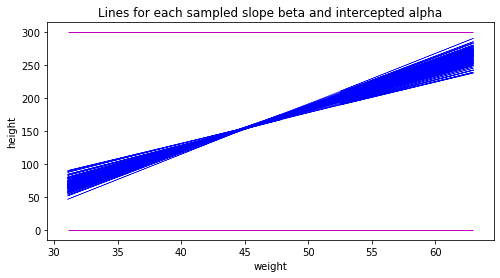

In [78]:
beta = df_fit_2['beta']
alpha = df_fit_2['alpha']

fig, axes = plt.subplots(1,1,figsize=(8, 4))

for i in range(100):
    axes.plot(d.weight, alpha[i]+beta[i]*d.c_weight, linewidth = 0.5, color = 'b')
plt.title("Lines for each sampled slope beta and intercepted alpha")
axes.set_xlabel('weight')
axes.set_ylabel('height')
axes.hlines([0, 300], xmin = d.weight.min(), xmax = d.weight.max(), linestyles = '-',linewidth = 1, color = 'm')

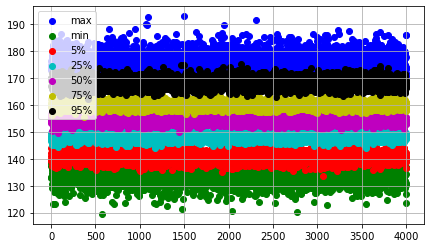

In [79]:
sim_height = fit.stan_variable('height')
x_list = [i for i in range (len(sim_height))]
max_height = []
min_height = []

five_quantile = []
twofive_quantile = []
fifty_quantile = []
sevenFive_quantile = []
nineFive_qantile = []
for vector in sim_height:
    five_quantile.append(np.percentile(vector,5))
    twofive_quantile.append(np.percentile(vector,25))
    fifty_quantile.append(np.percentile(vector,50))
    sevenFive_quantile.append(np.percentile(vector,75))
    nineFive_qantile.append(np.percentile(vector,95))
    max_height.append(np.max(vector))
    min_height.append(np.min(vector))

fig, axes = plt.subplots(1,1,figsize=(7,4))
plt.scatter(x_list, max_height, color = 'b')
plt.scatter(x_list, min_height, color = 'g')
plt.scatter(x_list, five_quantile, color = 'r')
plt.scatter(x_list, twofive_quantile, color = 'c')
plt.scatter(x_list, fifty_quantile,  color = 'm')
plt.scatter(x_list, sevenFive_quantile, color = 'y')
plt.scatter(x_list, nineFive_qantile,  color = 'k') 
plt.legend(['max','min','5%','25%','50%','75%','95%'])
plt.grid()